((based on https://hamelg.blogspot.com/search/label/Python%20for%20data%20analysis in particular Sections 21 to 24))

In [6]:
!pip install ggplot

You are using pip version 8.1.0, however version 8.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
%matplotlib inline

In [32]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

# Step 1: Descriptive Statistics

## Measures of Center

Measures of center are statistics that give us a sense of the "middle" of a numeric variable. In other words, centrality measures give you a sense of a typical value you'd expect to see. Common measures of center include the mean, median and mode.

The mean is simply an average: the sum of the values divided by the total number of records. We can use df.mean() to get the mean of each column in a DataFrame:

In [9]:
from ggplot import mtcars # get an example data set

In [12]:
mtcars # have a look - it's car stats

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
name,,,,,,,,,,,,
Mazda RX4,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [13]:
mtcars.index = mtcars["name"] # Use the name as index, rather than just numbering the entries
mtcars.mean()                 # Get the mean of each column

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

The median of a distribution is the value where 50% of the data lies below it and 50% lies above it. In essence, the median splits the data in half. The median is also known as the 50% percentile since 50% of the observations are found below it. You can get the median using the df.median() function:

In [14]:
mtcars.median()                 # Get the median of each column

mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.710
vs        0.000
am        0.000
gear      4.000
carb      2.000
dtype: float64

The median always gives us a value that splits the data into two halves while the mean is a numeric average so extreme values can have a significant impact on the mean. So ideally, we report both. Furthermore, if you have data that is purely categorical values represented as numbers or values that do not have a clear numeric relation between values, then the mean is not really meaningful. We call these data from "nominal" or "ordinal" scales, as opposed to from "interval" or "ratio" scales. An example would be Likert-style questionnaire data (from "disagree" to "agree").

The mode of a variable is simply the value that appears most frequently. Unlike mean and median, you can take the mode of a categorical variable and it is possible to have multiple modes. Find the mode with df.mode():

In [15]:
mtcars.mode()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,NaN,10.4,8,275.8,110,3.07,3.44,17.02,0,0,3,2
1,NaN,15.2,NaN,NaN,175,3.92,NaN,18.90,NaN,NaN,NaN,4
2,NaN,19.2,NaN,NaN,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,21.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,22.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,30.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The columns with multiple modes (multiple values with the same count) return multiple values as the mode. Columns with no mode (no value that appears more than once) return NaN (a special value for "not a number").

## Measures of Spread

Measures of spread (dispersion) are statistics that describe how data varies. While measures of center give us an idea of the typical value, measures of spread give us a sense of how much the data tends to diverge from the typical value.
One of the simplest measures of spread is the range. Range is the distance between the maximum and minimum observations:

In [16]:
max(mtcars["mpg"]) - min(mtcars["mpg"])

23.5

As noted earlier, the median represents the 50th percentile of a data set. A summary of several percentiles can be used to describe a variable's spread. We can extract the minimum value (0th percentile), first quartile (25th percentile), median, third quartile(75th percentile) and maximum value (100th percentile) using the quantile() function:

In [17]:
five_num = [mtcars["mpg"].quantile(0),   
            mtcars["mpg"].quantile(0.25),
            mtcars["mpg"].quantile(0.50),
            mtcars["mpg"].quantile(0.75),
            mtcars["mpg"].quantile(1)]

five_num

[10.4,
 15.425000000000001,
 19.199999999999999,
 22.800000000000001,
 33.899999999999999]

Since these values are so commonly used to describe data, they are known as the "five number summary". They are the same percentile values returned by df.describe():

In [18]:
mtcars["mpg"].describe()

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64

Interquartile (IQR) range is another common measure of spread. IQR is the distance between the 3rd quartile and the 1st quartile:

In [19]:
mtcars["mpg"].quantile(0.75) - mtcars["mpg"].quantile(0.25)

7.375

A usual "boxplot" is a visual representation of the five number summary and IQR:

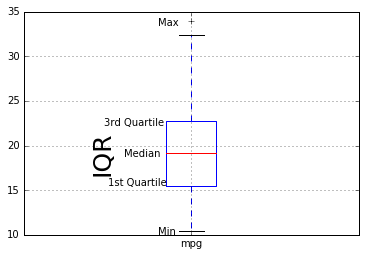

In [20]:
mtcars.boxplot(column="mpg",
               return_type='axes',
               figsize=(8,8))

plt.text(x=0.74, y=22.25, s="3rd Quartile")
plt.text(x=0.8, y=18.75, s="Median")
plt.text(x=0.75, y=15.5, s="1st Quartile")
plt.text(x=0.9, y=10, s="Min")
plt.text(x=0.9, y=33.5, s="Max")
plt.text(x=0.7, y=19.5, s="IQR", rotation=90, size=25)

Variance and standard deviation are two other common measures of spread. The variance of a distribution is the average of the squared deviations (differences) from the mean. Use df.var() to check variance:

In [21]:
mtcars["mpg"].var()

36.32410282258065

The standard deviation is the square root of the variance. Standard deviation can be more interpretable than variance, since the standard deviation is expressed in terms of the same units as the variable in question while variance is expressed in terms of units squared. Use df.std() to check the standard deviation:

In [23]:
mtcars["mpg"].std()

6.026948052089105

Since variance and standard deviation are both derived from the mean, they are susceptible to the influence of data skew and outliers. "Median absolute deviation" (MAD) is an alternative measure of spread based on the median, which inherits the median's robustness against the influence of skew and outliers. It is the median of the absolute value of the deviations from the median:

In [24]:
abs_median_devs = abs(mtcars["mpg"] - mtcars["mpg"].median())

abs_median_devs.median() * 1.4826

5.411490000000001

*Note: The MAD is often multiplied by a scaling factor of 1.4826 for data that is assumed to be normally distributed in order to make it directly comparable to the standard deviation.

## Skewness and Kurtosis

Beyond measures of center and spread, descriptive statistics include measures that give you a sense of the shape of a distribution. Skewness measures the skew or asymmetry of a distribution while kurtosis measures the "peakedness" of a distribution.

Mathematically: while variance involves squaring deviations from the mean, skewness involves cubing deviations from the mean and kurtosis involves raising deviations from the mean to the 4th power.

Pandas has built in functions for checking skewness and kurtosis, df.skew() and df.kurt() respectively:

In [25]:
mtcars["mpg"].skew()  # Check skewness

0.6723771376290919

In [26]:
mtcars["mpg"].kurt()  # Check kurtosis

-0.022006291424083859

To explore these two measures further, let's create some dummy data and inspect it. Note that the following examples use code to generate fake data that exhibits a certain distribution. You can simply ignore these for now (or look them up and learn more about common distributions).

In [27]:
norm_data = np.random.normal(size=100000)
skewed_data = np.concatenate((np.random.normal(size=35000)+2, 
                             np.random.exponential(size=65000)), 
                             axis=0)
uniform_data = np.random.uniform(0,2, size=100000)
peaked_data = np.concatenate((np.random.exponential(size=50000),
                             np.random.exponential(size=50000)*(-1)),
                             axis=0)

data_df = pd.DataFrame({"norm":norm_data,
                       "skewed":skewed_data,
                       "uniform":uniform_data,
                       "peaked":peaked_data})

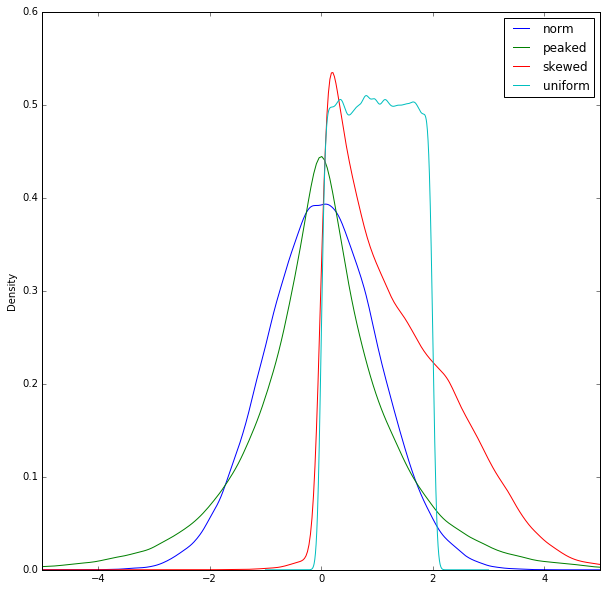

In [28]:
data_df.plot(kind="density",
            figsize=(10,10),
            xlim=(-5,5))

Now let's check the skewness of each of the distributions. Since skewness measures asymmetry, we'd expect to see low skewness for all of the distributions except the skewed one, because all the others are roughly symmetric:

In [29]:
data_df.skew()

norm      -0.012419
peaked    -0.034989
skewed     1.013839
uniform   -0.000273
dtype: float64

Now let's check kurtosis. Since kurtosis measures peakedness, we'd expect the flat (uniform) distribution have low kurtosis while the distributions with sharper peaks should have higher kurtosis.

In [30]:
data_df.kurt()

norm       0.010234
peaked     2.969075
skewed     1.435642
uniform   -1.194481
dtype: float64

Descriptive statistics help you explore features of your data, like center, spread and shape by summarizing them with numerical measurements. Descriptive statistics help inform the direction of an analysis and let you communicate your insights to others quickly and succinctly. In addition, certain values, like the mean and variance, are used in all sorts of statistical tests and predictive models.

# Step 2: Statistical inference

Statistical inference is the process of analyzing sample data to gain insight into the population from which the data was collected and to investigate differences between data samples. In data analysis, we are often interested in the characteristics of some large population, but collecting data on the entire population may be infeasible. For example, leading up to U.S. presidential elections it could be very useful to know the political leanings of every single eligible voter, but surveying every voter is not feasible. Instead, we could poll some subset of the population, such as a thousand registered voters, and use that data to make inferences about the population as a whole.

## Point Estimates

Point estimates are estimates of population parameters based on sample data. For instance, if we wanted to know the average age of registered voters in the U.S., we could take a survey of registered voters and then use the average age of the respondents as a point estimate of the average age of the population as a whole. The average of a sample is known as the sample mean.

The sample mean is usually not exactly the same as the population mean. This difference can be caused by many factors including poor survey design, biased sampling methods and the randomness inherent to drawing a sample from a population. Let's investigate point estimates by generating a population of random age data and then drawing a sample from it to estimate the mean:

In [33]:
np.random.seed(10)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

population_ages.mean() # what is the true mean age of the population of 250000 fake people?

43.002372000000001

In [38]:
np.random.seed(6)
sample_ages = np.random.choice(a=population_ages, size=500) # Sample 500 values

sample_ages.mean() # Show sample mean

42.387999999999998

Check difference between sample meand and true mean:

In [39]:
population_ages.mean() - sample_ages.mean()

0.61437200000000303

Our point estimate based on a sample of 500 individuals underestimates the true population mean by 0.6 years, but it is close. This illustrates an important point: we can get a fairly accurate estimate of a large population by sampling a relatively small subset of individuals.

Another point estimate that may be of interest is the proportion of the population that belongs to some category or subgroup. For example, we might like to know the race of each voter we poll, to get a sense of the overall demographics of the voter base. You can make a point estimate of this sort of proportion by taking a sample and then checking the ratio in the sample:

In [40]:
random.seed(10)
population_races = (["white"]*100000) + (["black"]*50000) +\
                   (["hispanic"]*50000) + (["asian"]*25000) +\
                   (["other"]*25000)
    
demo_sample = random.sample(population_races, 1000)   # Sample 1000 values

for race in set(demo_sample):
    print( race + " proportion estimate:" )
    print( demo_sample.count(race)/1000 )

other proportion estimate:
0.099
hispanic proportion estimate:
0.192
black proportion estimate:
0.231
asian proportion estimate:
0.099
white proportion estimate:
0.379


Are the proportion estimates close to the true underlying population proportions?

## Sampling Distributions and The Central Limit Theorem

Many statistical procedures assume that data follows a normal distribution, because the normal distribution has nice properties like symmetricity and having the majority of the data clustered within a few standard deviations of the mean. Unfortunately, real world data is often not normally distributed and the distribution of a sample tends to mirror the distribution of the population. This means a sample taken from a population with a skewed distribution will also tend to be skewed. Let's investigate by plotting the data and sample we created earlier and by checking the skew, starting with the full data. We can't sensibly plot all values, so we use a histogram to show in what "buckets" or "bins" the data values fall:

-0.12008483603917186


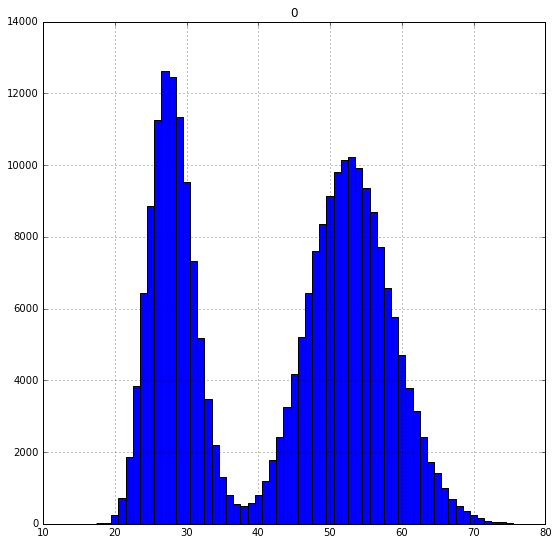

In [42]:
pd.DataFrame(population_ages).hist(bins=58,
                                  range=(17.5,75.5),
                                  figsize=(9,9))

print( stats.skew(population_ages) )

The distribution has low skewness, but the plot reveals the data is clearly not normal: instead of one symmetric bell curve, it has a so-called bimodal distribution with two high density peaks. The sample we drew from this population should have roughly the same shape and skew:

-0.056225282585406065


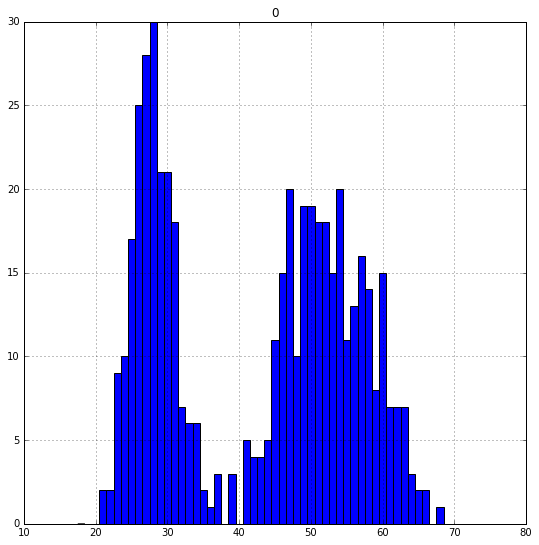

In [43]:
pd.DataFrame(sample_ages).hist(bins=58,
                                  range=(17.5,75.5),
                                  figsize=(9,9))

print( stats.skew(sample_ages) )

The sample has roughly the same shape as the underlying population. This suggests that we can't apply techniques that assume a normal distribution to this data set, since it is not normal. In reality, we can, thanks the central limit theorem.

The central limit theorem is one of the most important results of probability theory and serves as the foundation of many methods of statistical analysis. At a high level, the theorem states that the distribution of many sample means, known as a sampling distribution, will be normally distributed. This rule holds even if the underlying distribution itself is not normally distributed. As a result we can treat the sample mean as if it were drawn normal distribution.

To illustrate, let's create a sampling distribution by taking 200 samples from our population and then making 200 point estimates of the mean:

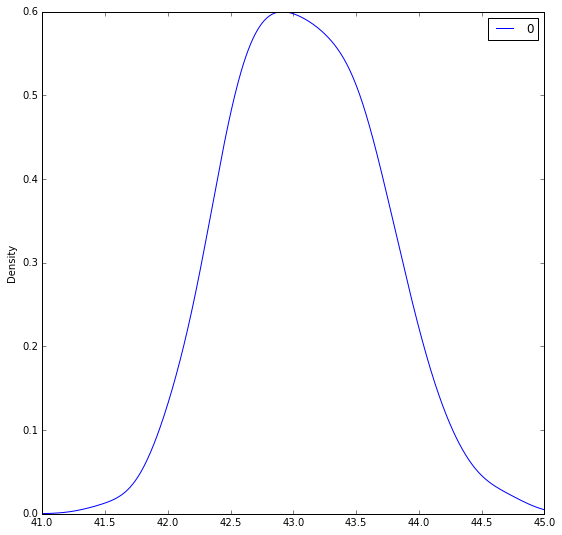

In [44]:
np.random.seed(10)

point_estimates = []         # Make empty list to hold point estimates

for x in range(200):         # Generate 200 samples, each with 500 sampled values
    sample = np.random.choice(a= population_ages, size=500)
    point_estimates.append( sample.mean() ) # keep the sample mean in the list
    
pd.DataFrame(point_estimates).plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(41,45))   

The sampling distribution appears to be roughly normal, despite the bimodal population distribution that the samples were drawn from. In addition, the mean of the sampling distribution approaches the true population mean:

In [45]:
population_ages.mean() - np.array(point_estimates).mean()

-0.084407999999996264

The more samples we take, the better our estimate of the population parameter is likely to be.

## Confidence Intervals

A point estimate can give you a rough idea of a population parameter like the mean, but estimates are prone to error and taking multiple samples to get improved estimates may not be feasible. A confidence interval is a range of values above and below a point estimate that captures the true population parameter at some predetermined confidence level. For example, if you want to have a 95% chance of capturing the true population parameter with a point estimate and a corresponding confidence interval, you'd set your confidence level to 95%. Higher confidence levels result in a wider confidence intervals.

Calculate a confidence interval by taking a point estimate and then adding and subtracting a margin of error to create a range. Margin of error is based on your desired confidence level, the spread of the data and the size of your sample. The way you calculate the margin of error depends on whether you know the standard deviation of the population or not.

If you know the standard deviation of the population, the margin of error is equal to:

\begin{equation*}
z^* \frac{\sigma}{\sqrt{n}}
\end{equation*}

Where σ (sigma) is the population standard deviation, n is sample size, and z* is a number known as the z-critical value. The z-critical value is the number of standard deviations you'd have to go from the mean of the normal distribution to capture the proportion of the data associated with the desired confidence level. For instance, we know that roughly 95% of the data in a normal distribution lies within 2 standard deviations of the mean, so we could use 2 as the z-critical value for a 95% confidence interval (although it is more exact to get z-critical values with stats.norm.ppf().).

Let's calculate a 95% confidence for our mean point estimate:

In [48]:
np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a= population_ages, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = population_ages.std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.95996398454
Confidence interval:
(41.703064068826833, 43.342935931173173)


*Note: We use stats.norm.ppf(q = 0.975) to get the desired z-critical value instead of q = 0.95 because the distribution has two tails. (The function ppf returns an appropriate value fo checking in one direction, so 97.5% leaves 2.5% in both directions, for a total of 5%, giving the 95% confidence interval.)

Notice that the confidence interval we calculated captures the true population mean of 43.0023.

Let's create several confidence intervals and plot them to get a better sense of what it means to "capture" the true mean:

In [51]:
np.random.seed(12)

sample_size = 1000

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= population_ages, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    pop_stdev = population_ages.std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

Let's plot the sample means we found with error bars showing the confidence interval, adding a red line to show the true mean:

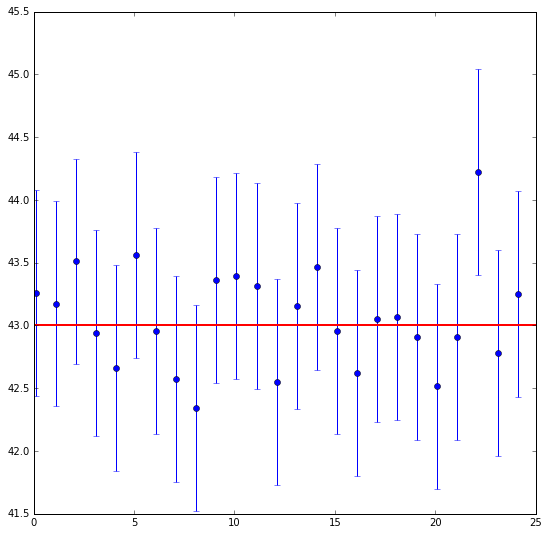

In [52]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=43.0023, 
           linewidth=2.0,
           color="red")

Notice that in the plot above, all but one of the 95% confidence intervals overlap the red line marking the true mean. This is to be expected: since a 95% confidence interval captures the true mean 95% of the time, we'd expect our interval to miss the true mean 5% of the time.

If you don't know the standard deviation of the population, you have to use the standard deviation of your sample as a stand in when creating confidence intervals. Since the sample standard deviation may not match the population parameter the interval will have more error when you don't know the population standard deviation. To account for this error, we use what's known as a t-critical value instead of the z-critical value. The t-critical value is drawn from what's known as a t-distribution--a distribution that closely resembles the normal distribution but that gets wider and wider as the sample size falls. The t-distribution is available in scipy.stats with the nickname "t" so we can get t-critical values with stats.t.ppf().

Let's take a new, smaller sample and then create a confidence interval without the population standard deviation, using the t-distribution:

In [53]:
np.random.seed(10)

sample_size = 25
sample = np.random.choice(a= population_ages, size = sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df=24)  # Get the t-critical value*

print("t-critical value:")                  # Check the t-critical value
print(t_critical)                        

sample_stdev = sample.std()    # Get the sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

t-critical value:
2.06389856163
Confidence interval:
(37.757112737010608, 48.002887262989397)


*Note: when using the t-distribution, you have to supply the degrees of freedom (df). For this type of test, the degrees of freedom is equal to the sample size minus 1. If you have a large sample size, the t-distribution approaches the normal distribution.

Notice that the t-critical value is larger than the z-critical value we used for 95% confidence interval. This allows the confidence interval to cast a larger net to make up for the variability caused by using the sample standard deviation in place of the population standard deviation. The end result is a much wider confidence interval (an interval with a larger margin of error.).

If you have a large sample, the t-critical value will approach the z-critical value so there is little difference between using the normal distribution vs. the t-distribution:

In [54]:
# Check the difference between critical values with a sample size of 1000
             
stats.t.ppf(q=0.975, df= 999) - stats.norm.ppf(0.975)

0.0023774765933946007

Instead of calculating a confidence interval for a mean point estimate by hand, you can calculate it using the Python function stats.t.interval():

In [56]:
stats.t.interval(alpha=0.95,              # Confidence level
                 df=24,                   # Degrees of freedom
                 loc=sample_mean,         # Sample mean
                 scale=sigma)             # Standard deviation estimate

(37.757112737010608, 48.002887262989397)

We can also make a confidence interval for a point estimate of a population proportion. In this case, the margin of error equals:

\begin{equation*}
z^* \sqrt{\frac{p(1-p)}{n}}
\end{equation*}

Where z* is the z-critical value for our confidence level, p is the point estimate of the population proportion and n is the sample size. Let's calculate a 95% confidence interval for Hispanics according to the sample proportion we calculated earlier (0.192):

In [57]:
z_critical = stats.norm.ppf(0.975)      # Record z-critical value

p = 0.192                               # Point estimate of proportion

n = 1000                                # Sample size

margin_of_error = z_critical * math.sqrt((p*(1-p))/n)

confidence_interval = (p - margin_of_error,  # Calculate the the interval
                       p + margin_of_error) 

confidence_interval

(0.16758794241348748, 0.21641205758651252)

The output shows that the confidence interval captured the true population parameter of 0.2. Similar to our population mean point estimates, we can use the scipy stats.distribution.interval() function to calculate a confidence interval for a population proportion for us. In this case were working with z-critical values so we want to work with the normal distribution instead of the t distribution:

In [59]:
stats.norm.interval(alpha=0.95,    # Confidence level             
                    loc=0.192,     # Point estimate of proportion
                    scale=math.sqrt((p*(1-p))/n))  # Scaling factor

(0.16758794241348748, 0.21641205758651252)

## Statistical Hypothesis Testing: The t-test

Point estimates and confidence intervals are basic inference tools that act as the foundation for another inference technique: statistical hypothesis testing. Statistical hypothesis testing is a framework for determining whether observed data deviates from what is expected. Python's scipy.stats library contains an array of functions that make it easy to carry out hypothesis tests.

### Basics

Statistical hypothesis tests are based a statement called the null hypothesis that assumes nothing interesting is going on between whatever variables you are testing. The exact form of the null hypothesis varies from one type test to another: if you are testing whether groups differ, the null hypothesis states that the groups are the same. For instance, if you wanted to test whether the average age of voters in your home state differs from the national average, the null hypothesis would be that there is no difference between the average ages.

The purpose of a hypothesis test is to determine whether the null hypothesis is likely to be true given sample data. If there is little evidence against the null hypothesis given the data, you accept the null hypothesis. If the null hypothesis is unlikely given the data, you might reject the null in favor of the alternative hypothesis: that something interesting is going on. The exact form of the alternative hypothesis will depend on the specific test you are carrying out. Continuing with the example above, the alternative hypothesis would be that the average age of voters in your state does in fact differ from the national average.

Once you have the null and alternative hypothesis in hand, you choose a significance level (often denoted by the Greek letter α.). The significance level is a probability threshold that determines when you reject the null hypothesis. After carrying out a test, if the probability of getting a result as extreme as the one you observe due to chance is lower than the significance level, you reject the null hypothesis in favor of the alternative. This probability of seeing a result as extreme or more extreme than the one observed is known as the p-value.

The T-test is a statistical test used to determine whether a numeric data sample differs significantly from the population or whether two samples differ from one another.

### One-Sample T-Test

A one-sample t-test checks whether a sample mean differs from the population mean. Let's create some dummy age data for the population of voters in the entire country and a sample of voters in Minnesota and test the whether the average age of voters Minnesota differs from the population:

In [60]:
np.random.seed(6)

population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

minnesota_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
minnesota_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
minnesota_ages = np.concatenate((minnesota_ages1, minnesota_ages2))

print( population_ages.mean() )
print( minnesota_ages.mean() )

43.000112
39.26


Notice that we used a slightly different combination of distributions to generate the sample data for Minnesota, so we know that the two means are different. Let's conduct a t-test at a 95% confidence level and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the population. To conduct a one sample t-test, we can the stats.ttest_1samp() function:

In [62]:
stats.ttest_1samp(a=minnesota_ages,               # Sample data
                  popmean=population_ages.mean()) # Pop mean

Ttest_1sampResult(statistic=-2.5742714883655027, pvalue=0.013118685425061678)

The test result shows the test statistic "t" is equal to -2.574. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We can check the quantiles with stats.t.ppf():

In [63]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=49)    # Degrees of freedom

-2.0095752344892093

In [64]:
stats.t.ppf(q=0.975,  # Quantile to check
            df=49)    # Degrees of freedom

2.0095752344892088

We can calculate the chances of seeing a result as extreme as the one we observed (known as the p-value) by passing the t-statistic in as the quantile to the stats.t.cdf() function:

In [65]:
stats.t.cdf(x=-2.5742,  # T-test statistic
            df=49) * 2  # Mupltiply by two for two tailed test*

0.013121066545690117

*Note: The alternative hypothesis we are checking is whether the sample mean differs (is not equal to) the population mean. Since the sample could differ in either the positive or negative direction we multiply the by two.

Notice this value is the same as the p-value listed in the original t-test output. A p-value of 0.01311 means we'd expect to see data as extreme as our sample due to chance about 1.3% of the time if the null hypothesis was true. In this case, the p-value is lower than our significance level α (equal to 1-conf.level or 0.05) so we should reject the null hypothesis. If we were to construct a 95% confidence interval for the sample it would not capture population mean of 43:

In [66]:
sigma = minnesota_ages.std() / math.sqrt(50)  # Sample stdev/sample size

stats.t.interval(0.95,                      # Confidence level
                 df=49,                     # Degrees of freedom
                 loc=minnesota_ages.mean(), # Sample mean
                 scale=sigma)               # Standard dev estimate

(36.369669080722176, 42.15033091927782)

On the other hand, since there is a 1.3% chance of seeing a result this extreme due to chance, it is not significant at the 99% confidence level. This means if we were to construct a 99% confidence interval, it would capture the population mean:

In [67]:
stats.t.interval(alpha=0.99,                # Confidence level
                 df=49,                     # Degrees of freedom
                 loc=minnesota_ages.mean(), # Sample mean
                 scale=sigma)               # Standard dev estimate

(35.405479940921069, 43.114520059078927)

With a higher confidence level, we construct a wider confidence interval and increase the chances that it captures to true mean, thus making it less likely that we'll reject the null hypothesis. In this case, the p-value of 0.013 is greater than our significance level of 0.01 and we fail to reject the null hypothesis.

### Two-Sample T-Test

A two-sample t-test investigates whether the means of two independent data samples differ from one another. In a two-sample test, the null hypothesis is that the means of both groups are the same. Unlike the one sample-test where we test against a known population parameter, the two sample test only involves sample means. You can conduct a two-sample t-test by passing with the stats.ttest_ind() function. Let's generate a sample of voter age data for Wisconsin and test it against the sample we made earlier:

In [68]:
np.random.seed(12)
wisconsin_ages1 = stats.poisson.rvs(loc=18, mu=33, size=30)
wisconsin_ages2 = stats.poisson.rvs(loc=18, mu=13, size=20)
wisconsin_ages = np.concatenate((wisconsin_ages1, wisconsin_ages2))

print( wisconsin_ages.mean() )

42.8


In [70]:
stats.ttest_ind(a=minnesota_ages,
                b=wisconsin_ages,
                equal_var=False)    # Assume samples have equal variance?

Ttest_indResult(statistic=-1.7083870793286842, pvalue=0.090731043439577483)

The test yields a p-value of 0.0907, which means there is a 9% chance we'd see sample data this far apart if the two groups tested are actually identical. If we were using a 95% confidence level we would fail to reject the null hypothesis, since the p-value is greater than the corresponding significance level of 5%.

### Paired T-Test

The basic two sample t-test is designed for testing differences between independent groups. In some cases, you might be interested in testing differences between samples of the same group at different points in time. For instance, a hospital might want to test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment. A paired t-test lets you check whether the means of samples from the same group differ.

We can conduct a paired t-test using the scipy function stats.ttest_rel(). Let's generate some dummy patient weight data and do a paired t-test:

In [71]:
np.random.seed(11)

before= stats.norm.rvs(scale=30, loc=250, size=100)

after = before + stats.norm.rvs(scale=5, loc=-1.25, size=100)

weight_df = pd.DataFrame({"weight_before":before,
                          "weight_after":after,
                          "weight_change":after-before})

weight_df.describe()             # Check a summary of the data

,weight_after,weight_before,weight_change
count,100.000000,100.000000,100.000000
mean,249.115171,250.345546,-1.230375
std,28.422183,28.132539,4.783696
min,165.913930,170.400443,-11.495286
25%,229.148236,230.421042,-4.046211
50%,251.134089,250.830805,-1.413463
75%,268.927258,270.637145,1.738673
max,316.720357,314.700233,9.759282


The summary shows that patients lost about 1.23 pounds on average after treatment. Let's conduct a paired t-test to see whether this difference is significant at a 95% confidence level:

In [73]:
stats.ttest_rel(a=before,
                b=after)

Ttest_relResult(statistic=2.5720175998568284, pvalue=0.011596444318439857)

The p-value in the test output shows that the chances of seeing this large of a difference between samples due to chance is just over 1%.

### Type I and Type II Error

The result of a statistical hypothesis test and the corresponding decision of whether to reject or accept the null hypothesis is not infallible. A test provides evidence for or against the null hypothesis and then you decide whether to accept or reject it based on that evidence, but the evidence may lack the strength to arrive at the correct conclusion. Incorrect conclusions made from hypothesis tests fall in one of two categories: type I error and type II error.

Type I error describes a situation where you reject the null hypothesis when it is actually true. This type of error is also known as a "false positive" or "false hit". The type 1 error rate is equal to the significance level α, so setting a higher confidence level (and therefore lower alpha) reduces the chances of getting a false positive.

Type II error describes a situation where you fail to reject the null hypothesis when it is actually false. Type II error is also known as a "false negative" or "miss". The higher your confidence level, the more likely you are to make a type II error.